# Modeling and Simulation in Python

HIV Model Notebook
Shirin Kuppusamy 

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [19]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Code from previous chapters

In [20]:
init = State(R=200,L=0,E=0,V=.0000004)
"""Make a state variable.
    
R = activated, unifected CD4 lymphocites
L = latetently infected cells
E = actively infected cells
V = free virions"""

'Make a state variable.\n    \nR = activated, unifected CD4 lymphocites\nL = latetently infected cells\nE = actively infected cells\nV = free virions'

In [21]:
    
system = System(mu=0.00136,gamma=1.36,delta=0.33,pi=100,sigma=2,tau=0.2,rho=0.1,alpha=0.036,beta=0.00027,t_0=0,t_end=120,dt=0.1)
    """Make a system variable.
    gamma = rate at which new,uninfected lymphocites arise
    tau = proportion at which lymphocites are infected
    mu = HIV independent death rate
    rho = proportion of cells that become latently infected
    alpha = rate of activation
    delta = rate of death of infected cells
    sigma = rate of death/removal of free virions
    pi = production rate of free virions
    beta = infection rate/free virions"""

'Make a system variable.\ngamma = rate at which new,uninfected lymphocites arise\ntau = proportion at which lymphocites are infected\nmu = HIV independent death rate\nrho = proportion of cells that become latently infected\nalpha = rate of activation\ndelta = rate of death of infected cells\nsigma = rate of death/removal of free virions\npi = production rate of free virions\nbeta = infection rate/free virions'

In [22]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State (r, l, e, v)
    t: time
    system: System object
    
    returns: State (init)
    """
    r, l, e, v = state

    activated_uninfected = ((system.gamma * system.tau) - (system.mu * r) - (system.beta * r * v)) * dt
    latently_infected = ((system.rho * system.beta * r * v) - (system.mu * l) - (system.alpha * l)) * dt
    actively_infected = (((1-system.rho) * (system.beta * r * v)) + (system.alpha * l) - (system.delta * e)) * dt
    free_virions = ((system.pi * e) - (system.sigma * v)) * dt
    
    r += activated_uninfected
    l += latently_infected
    e += actively_infected
    v += free_virions
    
    return State(R = r, L = l, E = e, V = v)

In [23]:
update_func(init,4,system)

,values
R,2.000000e+02
L,2.160000e-10
E,1.944000e-09
V,3.200000e-07


In [28]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    
    for t in linrange(t_0, t_end/dt):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [29]:
results = run_simulation(system,update_func)


,R,L,E,V
0.0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
1.0,200.000000,2.160000e-10,1.944000e-09,3.200000e-07
2.0,200.000000,3.879930e-10,3.435826e-09,2.754400e-07
3.0,200.000000,5.352811e-10,4.662479e-09,2.547103e-07
4.0,200.000000,6.708248e-10,5.748436e-09,2.503930e-07
5.0,200.000000,8.035308e-10,6.778062e-09,2.577987e-07
6.0,200.000000,9.397402e-10,7.810181e-09,2.740196e-07
7.0,200.000000,1.084200e-09,8.887563e-09,2.973175e-07
8.0,200.000000,1.240701e-09,1.004314e-08,3.267296e-07
9.0,200.000000,1.412500e-09,1.130409e-08,3.618151e-07


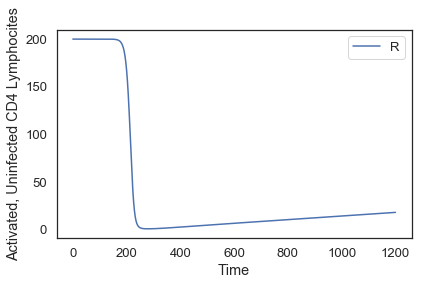

In [40]:
results.R.plot()
decorate(xlabel='Time',
        ylabel='Activated, Uninfected CD4 Lymphocites')

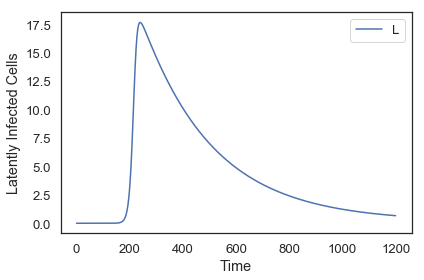

In [41]:
results.L.plot()
decorate(xlabel='Time',
        ylabel='Latently Infected Cells')

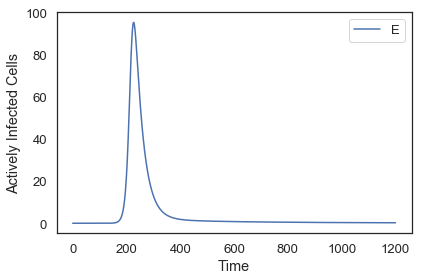

In [42]:
results.E.plot()
decorate(xlabel='Time',
        ylabel='Actively Infected Cells')

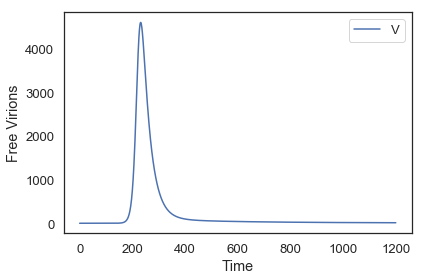

In [43]:
results.V.plot()
decorate(xlabel='Time',
        ylabel='Free Virions')